# ROC

在懂AUC和ROC曲线之前，要理解混淆矩阵. 混淆矩阵：
- 预测类别为1的为Positive（阳性），预测类别为0的为Negative（阴性）
- 预测正确的为True（真），预测错误的为False（伪）。

混淆矩阵：

-|-|Predict Lable|-
---|---|---|---
**-**|-|1(True)|0(False)
**True Lable**|1(Positive)|True Positive|False Positive
**-**|0(Negative)|False Negative|True Negative

由此引出True Positive Rate（真阳率）、False Positive（伪阳率）两个概念：
- $TPR=\frac{TP}{TP+FN}$ , 表示所有真实类别为1的样本中，预测类别为1的比例。
- $FPR=\frac{FP}{FP+TN}$ , 表示所有真实类别为0的样本中，预测类别为1的比例。

# AUC

AUC即ROC曲线下的面积，而ROC曲线的横轴是FPR，纵轴是TPR.

当二者相等时，即y=x，如下图所示，说明分类器对于正例和负例毫无区分能力，和抛硬币没什么区别，一个抛硬币的分类器是我们能想象的最差的情况，

因此一般来说我们认为AUC的最小值为0.5（当然也存在预测相反这种极端的情况，AUC小于0.5，这种情况相当于分类器总是把对的说成错的，错的认为是对的，那么只要把预测类别取反，便得到了一个AUC大于0.5的分类器）。

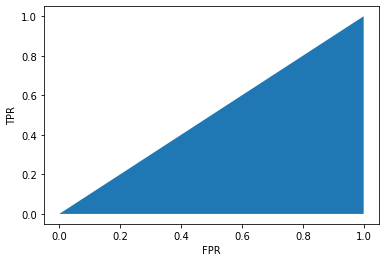

In [32]:
import matplotlib.pyplot as plt

x_data = [0,1]
y_data = [0,1]

plt.stackplot(x_data,y_data)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

而我们希望分类器达到的效果是：对于真实类别为1的样本，分类器预测为1的概率（即TPR），要大于真实类别为0而预测类别为1的概率（即FPR），即y＞x，因此大部分的ROC曲线长成下面这个样子：

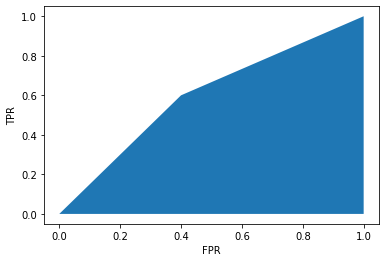

In [33]:
import matplotlib.pyplot as plt

x_data = [0,0.4,1]
y_data = [0,0.6,1]

plt.stackplot(x_data,y_data)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

最理想的情况下，既没有真实类别为1而错分为0的样本——TPRate一直为1，也没有真实类别为0而错分为1的样本——FPR一直为0，AUC为1，这便是AUC的极大值。

首先, 对于硬分类器（例如SVM，NB），预测类别为离散标签，对于8个样本的预测情况如下：

-|-|-|-|-|-|-|-|-
---|---|---|---|---|---|---|---|---
真实|1|1|1|1|0|0|0|0|
预测|1|0|1|1|0|1|1|0|

得到混淆矩阵如下：

-|1(True)|0(False)
---|---|---
1(Positive)|3|2
0(Negative)|1|2

进而算得：

- $TPR=\frac{3}{4}$

- $FPR=\frac{2}{4}$

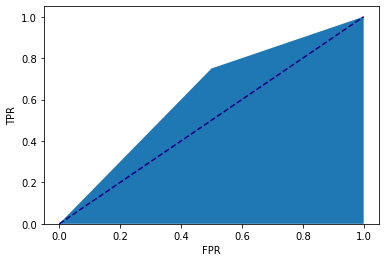

In [26]:
import matplotlib.pyplot as plt

x_data = [0,0.5,1]
y_data = [0,3/4,1]

plt.stackplot(x_data,y_data)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()

In [31]:
import numpy as np

def coss_multi(v1, v2):
    """
    计算两个向量的叉乘
    :param v1:
    :param v2:
    :return:
    """
    return v1[0]*v2[1] - v1[1]*v2[0]
 
def polygon_area(polygon):
    """
    计算多边形的面积，支持非凸情况
    :param polygon: 多边形顶点，已经进行顺次逆时针排序
    :return: 该多边形的面积
    """
    n = len(polygon)
 
    if n < 3:
        return 0
 
    vectors = np.zeros((n, 2))
    for i in range(0, n):
        vectors[i, :] = polygon[i, :] - polygon[0, :]
 
    area = 0
    for i in range(1, n):
        area = area + coss_multi(vectors[i-1, :], vectors[i, :]) / 2
 
    return area


arr=[[x,y] for x,y in zip(x_data,y_data)]
arr.append([1,0])
polygon1 = np.array(arr)
print(polygon1)
print(polygon_area(polygon1))

[[0.   0.  ]
 [0.5  0.75]
 [1.   1.  ]
 [1.   0.  ]]
-0.625


最终得到AUC为0.625。

对于LR等预测类别为概率的分类器，依然用上述例子，假设预测结果如下：

-|-|-|-|-|-|-|-|-
---|---|---|---|---|---|---|---|---
真实|1|1|1|1|0|0|0|0|
预测|0.8|0.3|0.9|0.6|0.1|0.5|0.7|0.2|

此时，需要设置阈值来得到混淆矩阵。不同的阈值会影响得到的TPR，FPR，如果阈值取0.5，小于0.5的为0，否则为1，那么就可以得到前面的混淆矩阵。依次把所有预测值作为阈值，得到一系列TPR，FPR，描点，求面积，即可得到AUC。

最后说说AUC的优势，AUC的计算方法同时考虑了分类器对于正例和负例的分类能力，在样本不平衡的情况下，依然能够对分类器作出合理的评价。例如在反欺诈场景，设欺诈类样本为正例，正例占比很少（假设0.1%），如果使用准确率评估，把所有的样本预测为负例，便可以获得99.9%的准确率。但是如果使用AUC，把所有样本预测为负例，TPRate和FPRate同时为0（没有Positive），与(0,0) (1,1)连接，得出AUC仅为0.5，成功规避了样本不均匀带来的问题。